<font size=6><font face="楷书">**Report - Fashion服装分类**</font></font>

姓名：崔科鑫

学号：2021260192

<font size=6><font face="楷书">**任务简介：**</font></font>

Fashion MNIST 旨在临时替代经典 MNIST 数据集，后者常被用作计算机视觉机器学习程序的“Hello, World”。MNIST 数据集包含手写数字（0、1、2 等）的图像，其格式与您将使用的衣物图像的格式相同。本代码使用 Fashion MNIST 来实现多样化，因为它比常规 MNIST 更具挑战性。这两个数据集都相对较小，都用于验证某个算法是否按预期工作。对于代码的测试和调试，它们都是很好的起点。在本指南中，我们使用 60,000 个图像来训练网络，使用 10,000 个图像来评估网络学习对图像分类的准确率，便于方便处理，直接从 TensorFlow 中导入和加载 Fashion MNIST 数据。最终实现对服装的多分类。

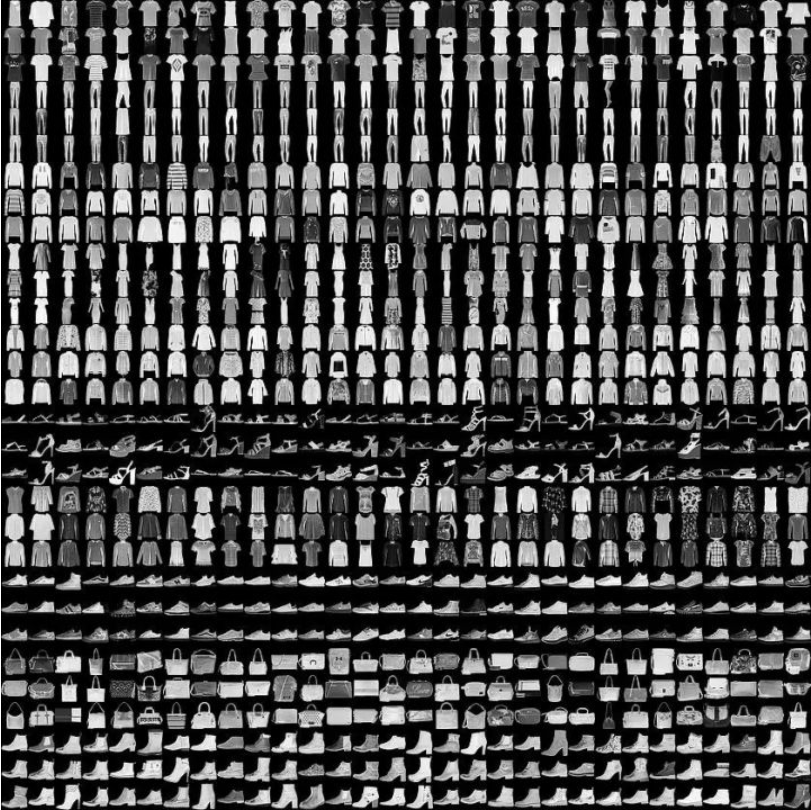

要求：

1、构建深度神经网络，完成多分类

2、编写爬虫程序，到taobao等网站抓取一些衣服、鞋子的图片，并利用训练好的模型进行分类

3、对于未属于训练数据集中的商品类别，考虑使用何种方法能够判断出类别为不支持的类别

4、评估自己抓取图像的分类精度

5、分析结果的效果，综合考虑各种方法，改进方法，并提交结果

<font size=6><font face="楷书">**解决途径：**</font></font>

<font size=5><font face="楷书">**题目分析：**</font></font>

本题数据有60000个训练数据，10000个测试数据，每个数据有28x28个特征，类似于之前Logistic对手写数据集进行多分类的情况。那道题是将图片分为10类，本题也是一样。由于样本容量大，同时特征多，我们首先训练出神经网络模型。

<font size=5><font face="楷书">**整体思路：**</font></font>

1、插入tensorflow和keras安装包

2、获取数据，读取数据，分别得到训练数据集和测试数据集

3、建立图形和模型

4、模型编译、评估及保存，并提取25个数据集，进行预测判断是否正确

5、绘图

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import gzip
import matplotlib

In [8]:
'''下载中文支持字体:后面画图需要
此处用到font_manager模块下的FontProperties类
其中FontProperties类用于存储和操作字体的属性，matplotlib支持的字体属性基于W3C Cascading Style Sheet, Level 1 font specification
主要有以下6个：字体类别（family）、字体风格（style）、字体粗细（weight）、字体大小（size）、字体拉伸（stretch）和字体变体（variant）'''
zhfont = matplotlib.font_manager.FontProperties(fname='D:/machine-learning-homework/report_03_Fashion/data/SimHei-windows.ttf')

In [9]:
# 一、数据（网络获取）
# 解析解压得到四个训练的数据
def read_data():
    files = [
        'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]
    # 我在当前的目录下创建文件夹，里面放入上面的四个压缩文件
    current = 'D:/machine-learning-homework/report_03_Fashion/data'
    # 创建一个空的path
    paths = []
    # len返回文件的长度
    for t in range(len(files)):
        paths.append('D:/machine-learning-homework/report_03_Fashion/data/' + files[t])
    # 文件的读操作with open(r'filename.txt') as f:  data_user=pd.read_csv(f)
    # numpy.frombuffer(buffer, dtype= , offset=0)
    # frombuffer将data以流的形式读入转化成ndarray对象
    # 第一参数为stream,第二参数为返回值的数据类型，第三参数指定从stream的第几位开始读入
    # data是字符串的时候，Python3默认str是Unicode类型，所以要转成bytestring在原str前加上b
    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)
    # reshape函数，numpy.frombuffer(a,b,c).reshape(m,n,o)  ：将array的维度变o 维 m 行 n列
    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)

In [10]:
# 分别得到训练数据集和测试数据集
(train_images, train_labels), (test_images, test_labels) = read_data()
class_names = ['短袖圆领T恤', '裤子', '套衫', '连衣裙', '外套',
              '凉鞋', '衬衫', '运动鞋','包', '短靴']

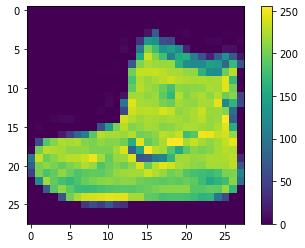

In [11]:
# 创建一个新图形
plt.figure()
# 显示一张图片在二维的数据上 train_images[0] 第一张图
plt.imshow(train_images[0])
# 在图中添加颜色条
plt.colorbar()
# 是否显示网格线条,True: 显示，False: 不显示
plt.grid(False)
# 训练图像缩放255，在0 和 1 的范围
train_images = train_images / 255.0
# 测试图像缩放
test_images = test_images / 255.0

In [12]:
# 建立模型
def build_model():
    model1=tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Conv2D(input_shape=(28,28,1),filters=32, kernel_size=5, strides=1, padding='same'))
    #输出28，28，32   same填充0  计算方法(28-4+2*2)+1
    model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))#14*14*32
    model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same'))#14*14*64
    model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))#7*7*64
    model1.add(tf.keras.layers.Flatten())
    model1.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    return model1
# 模型编译、评估及保存
model = build_model()
model.compile(
    optimizer=tf.compat.v1.train.AdamOptimizer(0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(train_images, train_labels, validation_split=0.33,epochs=20)# 训练模型
test_loss, test_acc = model.evaluate(test_images, test_labels)# 评估模型（主要是测试数据集）
model.save('D:/machine-learning-homework/report_03_Fashion/model/my1_model.h5')
print('测试损失：%f 测试准确率: %f' % (test_loss, test_acc))
model.summary()
predictions = model.predict(test_images)
# 提取25个数据集，进行预测判断是否正确
index = np.random.randint(0,1000,size=25)
for i in index:
    pre = class_names[np.argmax(predictions[i])]
    tar = class_names[test_labels[i]]
    print("预测：%s   实际：%s" % (pre, tar))

Epoch 1/20
1257/1257 [==============================] - 30s 22ms/step - loss: 0.6041 - accuracy: 0.7924 - val_loss: 0.4396 - val_accuracy: 0.8455
Epoch 2/20
1257/1257 [==============================] - 26s 21ms/step - loss: 0.4066 - accuracy: 0.8564 - val_loss: 0.3768 - val_accuracy: 0.8687
Epoch 3/20
1257/1257 [==============================] - 26s 21ms/step - loss: 0.3602 - accuracy: 0.8716 - val_loss: 0.3482 - val_accuracy: 0.8772
Epoch 4/20
1257/1257 [==============================] - 27s 21ms/step - loss: 0.3294 - accuracy: 0.8832 - val_loss: 0.3240 - val_accuracy: 0.8869
Epoch 5/20
1257/1257 [==============================] - 27s 22ms/step - loss: 0.3022 - accuracy: 0.8908 - val_loss: 0.3413 - val_accuracy: 0.8773
Epoch 6/20
1257/1257 [==============================] - 30s 24ms/step - loss: 0.2841 - accuracy: 0.8973 - val_loss: 0.2943 - val_accuracy: 0.8948
Epoch 7/20
1257/1257 [==============================] - 30s 24ms/step - loss: 0.2644 - accuracy: 0.9032 - val_loss: 0.2766 -

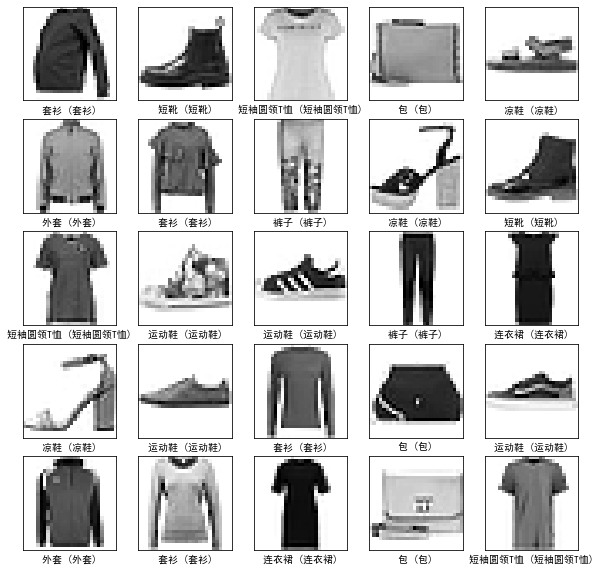

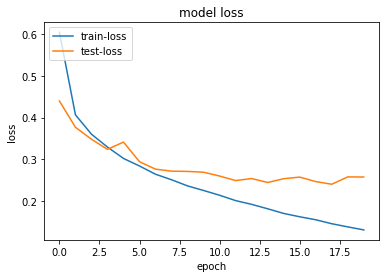

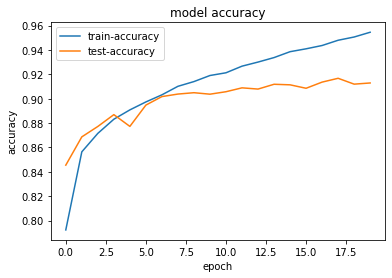

In [13]:
# 保存画布的图形，宽度为 10 ， 长度为10
plt.figure(figsize=(10, 10))
# 预测 25 张图像是否准确，不准确为红色。准确为蓝色
j=0
for i in index:
    # 创建分布 5 * 5 个图形
    plt.subplot(5, 5, j + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=j+1
    # 显示照片，以cm 为单位。
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # 预测的图片是否正确，黑色底表示预测正确，红色底表示预测失败
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'black'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
               color=color,
               fontproperties=zhfont)
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train-loss","test-loss"],loc="upper left")
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train-accuracy","test-accuracy"],loc="upper left")
plt.show()
Model: "sequential"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #
# =================================================================
# conv2d (Conv2D)              (None, 28, 28, 32)        832
# _________________________________________________________________
# max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0
# _________________________________________________________________
# conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496
# _________________________________________________________________
# max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0
# _________________________________________________________________
# flatten (Flatten)            (None, 3136)              0
# _________________________________________________________________
# dense (Dense)                (None, 256)               803072
# _________________________________________________________________
# dense_1 (Dense)              (None, 10)                2570
# =================================================================
# Total params: 824,970
# Trainable params: 824,970
# Non-trainable params: 0
# _________________________________________________________________


<font size=6><font face="楷书">**检验模型：**</font></font>

我们使用淘宝网上的各种图片进行预测分类，以此来检验模型的准确度

<font size=5><font face="楷书">**爬图片：**</font></font>

In [14]:
#-*- coding:utf-8 -*-
import re
import requests
import os
from bs4 import BeautifulSoup
 
url = 'https://orz123.cn/search/08XFoPv9-3.html'
html = requests.get(url).text  #获取网页内容
# print(html)
# 这里由于有些图片可能存在网址打不开的情况，加个5秒超时控制。
#data-objurl="http://pic38.nipic.com/20140218/17995031_091821599000_2.jpg"获取这种类型链接
soup = BeautifulSoup(html,'html.parser',from_encoding='utf-8')

pic_url = soup.find_all('img',{"src":re.compile(r'https://img.alicdn.com/bao/uploaded/.*?jpg$')})

# print(pic_url)
i = 5
cata='liang_shoes'
#判断image文件夹是否存在，不存在则创建
if not os.path.exists('image/'+cata):
    os.makedirs('image/'+cata)
for url in pic_url:
#     img = 'https:'+url['src']
    img =url['src']
    try:
        pic = requests.get(img,timeout=50)  #超时异常判断 5秒超时
    except requests.exceptions.ConnectionError:
        print('当前图片无法下载')
        continue
    file_name = "image/"+cata+"/"+str(i)+".jpg" #拼接图片名
    print(file_name)
    #将图片存入本地
    fp = open(file_name,'wb')
    fp.write(pic.content) #写入图片
    fp.close()
    i+=1

F:\Anaconda3\lib\site-packages\bs4\__init__.py:221: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


<font size=6><font face="楷书">**总结：**</font></font>

<font size=5><font face="楷书">**报错：**</font></font>

1、不能直接import keras，应在tensorflow中引用keras，即from tensorflow import keras

2、tensorflow和keras版本应该相对应，版本不匹配会出现很多问题，tensorflow 2.0/1.9/1.8/1.5/1.4/1.3/1.2 对应 keras 2.2.4/2.2.0/2.1.5/2.1.4/2.1.3/2.1.2/2.1.1

查看tensorflow版本：python >> import tensorflow as tf >> tf.__version__（注：单词version前后都是两个下划线）2.8.0（更新版本：pip install -U tensorflow-gpu==2.8.0）

查看keras版本：python >> print(keras.__version__)2.1.1

确定适合自己tensorflow的版本：anaconda show anaconda/tensorflow

3、相关课程《深度学习应用开发Tensorflow实践》

4、pip下载：https://pypi.org/project/pip/#files

两个版本区别：Source Distribution 是源代码版，你需要自己编译成可执行软件；Binary Distribution 是可执行版，直接可以拿来用的，他已经给你编译好的版本

5、如果pip install报错时，试试前面加python -m，例如：python -m pip isntall -U tensorflow（tensorflow更新）

6、pip Fatal error in launcher: Unable to create process using ...环境变量没设置好，在控制面板-系统-环境变量-系统变量-path添加启动项和安装包的路径即可

7、pip install 默认安装路径修改

（1）python -m site查看默认安装路径，USER_BASE python.exe启动程序路径，USER_SITE 依赖安装包基础路径

（2）python -m site -help查看对应配置文件，找到对应文件G:\Python\Python36\lib\site.py [--user-base] [--user-site]

（3）找到site.py配置文件，修改USER_SITE和USER_BASE

（4）USER_BASE: 'F:\\Anaconda3\\Scripts' (exists)  USER_SITE: 'F:\\Anaconda3\\Lib\\site-packages' (exists)

8、Python环境必须64位，在32位下tensorflow报错。

9、如若用pycharm

（1）FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.  _np_quint16 = np.dtype([("quint16", np.uint16, 1)]) 解决办法：打开对应程序，把1改成(1,)即可

（2）F:\Anaconda3\envs\pytorch\python.exe: can't open file 'C:/Users/R/Desktop/fashion_minist/ModelTrain.py': [Errno 2] No such file or directory  解决办法：打开上方Debug Configurations，将Script path配置到当前项目的路径

（3）ModuleNotFoundError: No module named 'keras.api'

<font size=5><font face="楷书">**程序：**</font></font>

1、机器学习的敲门砖Tensorflow：

自发布三年来，Tensorflow已经成为深度学习生态系统的基石，然而相比PyTorch、DyNet这样基于动态图“define-by-run”的库，它对初学者来说却并不直观。从线性回归、MNIST分类到机器翻译，Tensorflow的教程无处不在，它们是帮助新手开启项目的优质资源，也是新人接触机器学习的敲门砖。但对于机器学习还未涉足的空白领域，如果开发者想做一些原创性的突破，Tensorflow可能会让他们望而生畏。

2、gzip实现对获取到的云端gzip压缩数据进行还原，方便快捷。

3、Keras的底层库使用Theano或TensorFlow，这两个库也称为Keras的后端。无论是Theano还是TensorFlow，都是一个“符号式”的库。符号计算首先定义各种变量，然后建立一个“计算图”,计算图规定了各个变量之间的计算关系。

4、Python-with open() as f的用法

with open(r'filename.txt') as f:

   data_user=pd.read_csv(f)  #文件的读操作

with open('data.txt', 'w') as f:

   f.write('hello world')  #文件的写操作

相关参数：

r:	以只读方式打开文件。文件的指针将会放在文件的开头。这是**默认模式**。

rb: 以二进制格式打开一个文件用于只读。文件指针将会放在文件的开头。这是默认模式。

r+: 打开一个文件用于读写。文件指针将会放在文件的开头。

rb+:以二进制格式打开一个文件用于读写。文件指针将会放在文件的开头。

w:	打开一个文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。

wb:	以二进制格式打开一个文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。

w+:	打开一个文件用于读写。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。

wb+:以二进制格式打开一个文件用于读写。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。

a:	打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。也就是说，新的内容将会被写入到已有内容之后。如果该文件不存在，创建新文件进行写入。

ab:	以二进制格式打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。也就是说，新的内容将会被写入到已有内容之后。如果该文件不存在，创建新文件进行写入。

a+:	打开一个文件用于读写。如果该文件已存在，文件指针将会放在文件的结尾。文件打开时会是追加模式。如果该文件不存在，创建新文件用于读写。

ab+:以二进制格式打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。如果该文件不存在，创建新文件用于读写。

file对象的属性：

file.read([size])   将文件数据作为字符串返回，可选参数size控制读取的字节数

file.readlines([size])   返回文件中行内容的列表，size参数可选

file.write(str)   将字符串写入文件

file.writelines(strings)   将字符串序列写入文件

file.close()   关闭文件

file.closed	表示文件已经被关闭，否则为False

file.mode	Access文件打开时使用的访问模式

file.encoding	文件所使用的编码

file.name	文件名

file.newlines	未读取到行分隔符时为None，只有一种行分隔符时为一个字符串，当文件有多种类型的行结束符时，则为一个包含所有当前所遇到的行结束的列表

file.softspace	为0表示在输出一数据后，要加上一个空格符，1表示不加。这个属性一般程序员用不着，由程序内部使用



<font size=5><font face="楷书">**其他：**</font></font>

1、github各个license区别：开源项目的License（项目授权协议） 有的开源项目作者明确禁止商用了，但是你不知情下载了，并且使用了，这就会很麻烦

http://choosealicense.com/licenses/

2、ChromeDriver下载：如何爬网页，包括但不限于秒杀扒图

http://chromedriver.chromium.org/downloads

http://chromedriver.storage.googleapis.com/index.html

http://npm.taobao.org/mirrors/chromedriver/

查看Chrome版本信息：地址栏输入Chrome://version

3、设置默认浏览器：

（1）首先找到电脑的控制面板，并进入到控制面板中（开始—>控制面板）

（2）进入到控制面板后找到默认程序选项卡

（3）进入后再次选择默认程序选项，双击进入

（4）进入后系统会自动检测程序，在检测到的程序里面包含了电脑上的所有浏览器，选择需要设置的默认浏览器（比如IE浏览器）

（5）点击下方找到“将此程序设置为默认值（s）”，然后确定

4、任务栏卡顿

（1）打开任务管理器

（2）详细信息

（3）explorer文件夹 结束任务 结束进程

（4）点击左上角的文件 新建任务 输入explorer

5、各大网站

（1）国内技术社区

- [博客园](https://www.cnblogs.com/)

- [掘金](https://juejin.cn/)

- [思否](https://segmentfault.com)

- [开源中国](https://www.oschina.net/)

- [51CTO](https://www.51cto.com/)

- [V2EX](https://www.v2ex.com/)

- [开发者头条](https://toutiao.io/)

- [GitChat](https://gitbook.cn)

- [牛客网  一个互联网求职学习交流社区。](https://www.nowcoder.com)

（2）大佬的博客网站

- [阮一峰：计算机科普博主](http://www.ruanyifeng.com/home.html)

- [陈浩：左耳朵耗子](https://www.coolshell.cn/)

- [廖雪峰：启蒙老师，Python，Git系列教程作者](https://www.liaoxuefeng.com/ Python)

- [王垠：每写一篇文章都能引发争议的前Google程序员](http://www.yinwang.org/)

（3）外国技术社区

- [Stack Overflow ：全球最活跃的程序员技术问答交流社区，程序员的所有问题都能在上面找到答案。](https://stackoverflow.com/)

- [Medium](https://medium.com/)

- [Microsoft](http://docs.microsoft.com)

（4）电子书

- [书栈网](https://www.bookstack.cn/)

- [码农之家](https://www.xz577.com/)

（5）学编程的教学网站

- [菜鸟教程 ](https://www.runoob.com/)

- [W3Cschool](https://www.w3cschool.cn/)

- [http://how2j.cn](https://how2j.cn)

- [易百教程](https://www.yiibai.com/)

- [并发编程网](https://ifeve.com/)

（6）视频教学网站

- [B站](https://www.bilibili.com/)

- [慕课网](https://www.imooc.com/)

- [中国大学MOOC](https://www.icourse163.org/)

（7）面试刷题

- [LeetCode力扣经典的刷题网站，主要是算法题。](https://leetcode-cn.com/)

- [LintCode和LeetCode类似](https://www.lintcode.com/)

（8）接私活外快网站

- [猪八戒](https://www.zbj.com/)

- [程序员客栈](https://www.proginn.com/)

- [码市](https://codemart.com/)

- [开源中国众包平台](https://zb.oschina.net/)

- [人人开发](http://www.rrkf.com/)

